## Model Training

### 1.1 Import Data and Required Packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
DATA_PATH = '../notebook/data/study.csv'

In [3]:
df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
cat_col = [col for col in df_raw.columns if df_raw[col].dtypes == 'O']

for col in cat_col:
    print(f'{col}: {df_raw[col].unique()}')
    print("---" * 30)

gender: ['female' 'male']
------------------------------------------------------------------------------------------
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------------------------------------------------------
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------------------------------------------------------
lunch: ['standard' 'free/reduced']
------------------------------------------------------------------------------------------
test_preparation_course: ['none' 'completed']
------------------------------------------------------------------------------------------


In [5]:
df = df_raw.copy()

### Splitting into X and y

In [8]:
df = df.rename(columns={'math_score':'math', 'reading_score':'reading', 'writing_score':'writing'})

In [9]:
X = df.drop(columns=['math'], axis=1)

In [10]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading,writing
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
y = df['math']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math, Length: 1000, dtype: int64

### Preprocessing

In [16]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScalar", numeric_transformer, num_features)
    ]
)

In [18]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScalar', StandardScaler(),
                                 Index(['reading', 'writing'], dtype='object'))])

In [17]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

### Splitting into train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2899
- Mean Absolute Error: 4.2364
- R2 Score: 0.8786
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5854
- Mean Absolute Error: 4.3975
- R2 Score: 0.8623


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6102
- Mean Absolute Error: 5.1990
- R2 Score: 0.8104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7021
- Mean Absolute Error: 5.3566
- R2 Score: 0.8018


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2818
- Mean Absolute Error: 4.2268
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5674
- Mean Absolute Error: 4.3880
- R2 Score: 0.8632


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8034
- Mean Absolute Error: 4.6020
- R2 Score: 0.8538
-----------------------

### Results

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.863213
0,Linear Regression,0.862327
5,Random Forest Regressor,0.858470
7,AdaBoost Regressor,0.826364
6,XGBRegressor,0.818506
1,Lasso,0.801773
3,K-Neighbors Regressor,0.790108
4,Decision Tree,0.734578


#### Linear Regression

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.23


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

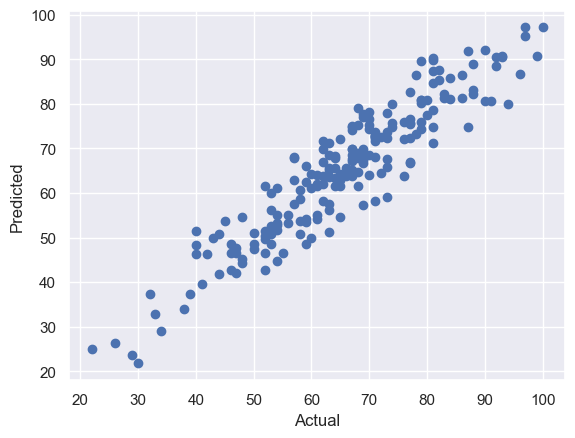

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math'>

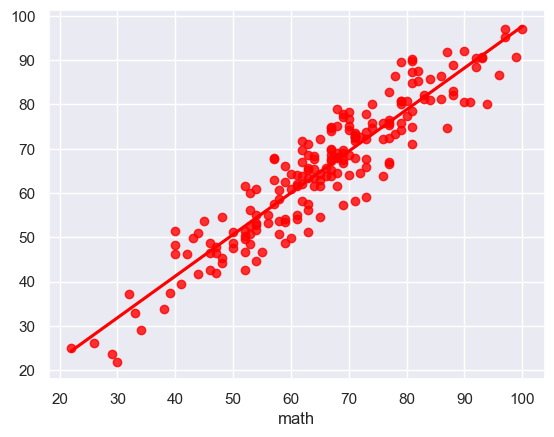

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values

In [33]:
pred_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
993,62,62.000,0.000
859,87,74.750,12.250
298,40,48.375,-8.375
553,77,66.625,10.375
672,69,69.750,-0.750
...,...,...,...
679,63,63.500,-0.500
722,74,75.750,-1.750
215,84,81.125,2.875
653,65,61.625,3.375
